# 第4章: 形態素解析

In [2]:
import MeCab
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
filename = "data\\neko.txt"
parsed = "data\\neko.txt.mecab"
mecab = MeCab.Tagger()

In [4]:
with open(filename, encoding="utf-8") as data, open(parsed, mode="w",encoding="utf-8") as output:
    output.write(mecab.parse(data.read()))

## 30. 形態素解析結果の読み込み

In [5]:
with open(parsed, encoding="utf-8") as parsed_file:
    parsed_data = parsed_file.readlines()
parsed_data = list(filter(lambda x: x != "", parsed_data))
parsed_data = list(filter(lambda x: "EOS" not in x, parsed_data))

In [6]:
def parsed(data):
    morpheme = []
    for line in data:
        tmp = line.split("\t")
        surface = tmp[0]
        attr = tmp[1]
        attr = attr.split(",")
        morpheme.append({"surface": surface,
                        "base": attr[6],
                        "pos": attr[0],
                        "pos1": attr[1]})
        if attr[1] == "句点":
            yield morpheme
            morpheme = []

In [7]:
parsed_neko = [line for line in parsed(parsed_data)]

## 31. 動詞

In [8]:
verb_surface = []
for sentence in parsed_neko:
    verb = list(filter(lambda x: x["pos"] == "動詞", sentence))
    surface = [sur["surface"] for sur in verb]
    verb_surface.append(surface)

## 32. 動詞の原形

In [9]:
verb_base = []
for sentence in parsed_neko:
    verb = list(filter(lambda x: x["pos"] == "動詞", sentence))
    base = [bas["base"] for bas in verb]
    verb_base.append(base)

## 33. 「AのB」

In [10]:
noun_phrases = []
for sentence in parsed_neko:
    for i in range(1, len(sentence)-1):
        if sentence[i-1]["pos"] == "名詞" and sentence[i]["surface"] == "の" and sentence[i+1]["pos"] == "名詞":
            noun_phrases.append(sentence[i-1]["surface"] + "の" + sentence[i+1]["surface"])

## 34. 名詞の連接

In [11]:
nouns = []
tmp = []
for sentence in parsed_neko:
    for parse in sentence:
        if parse["pos"] == "名詞":
            tmp.append(parse["surface"])
        elif len(tmp) >= 2:
            nouns.append("".join(tmp))
            tmp = []
        else:
            tmp = []

## 35. 単語の出現頻度

In [12]:
words = []
for sentence in parsed_neko:
    for word in sentence:
        words.append(word["base"])

In [13]:
d = defaultdict(int)
for word in words:
    d[word] += 1
wordscount = sorted(d.items(), key=lambda x:x[1], reverse=True)

## 36. 頻度上位10語

In [14]:
keys = [key[0] for key in wordscount]
counts = [key[1] for key in wordscount]

In [15]:
wordscount[:10]

[('の', 9194),
 ('。', 7486),
 ('て', 6853),
 ('、', 6772),
 ('は', 6422),
 ('に', 6268),
 ('を', 6071),
 ('だ', 5978),
 ('と', 5515),
 ('が', 5339)]

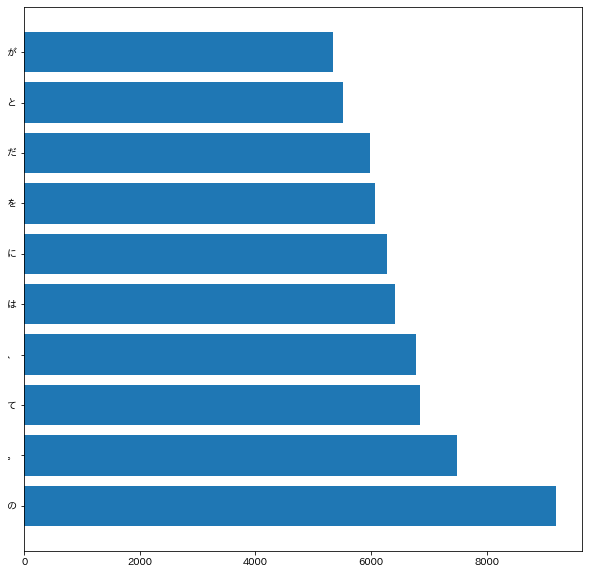

In [16]:
plt.figure(figsize=(10,10))
plt.barh(keys[:10], counts[:10])
plt.show()

## 37. 「猫」と共起頻度の高い上位10語

In [17]:
neko = []
for sentence in parsed_neko:
    for word in sentence:
        if word["surface"] == "猫":
            neko.append(sentence)
            break

In [18]:
neko_dict = defaultdict(int)
for sentence in neko:
    for word in sentence:
        if word["surface"] != "猫":
            neko_dict[word["surface"]] += 1
co_neko = sorted(neko_dict.items(), key=lambda x:x[1], reverse=True)

## 38. ヒストグラム

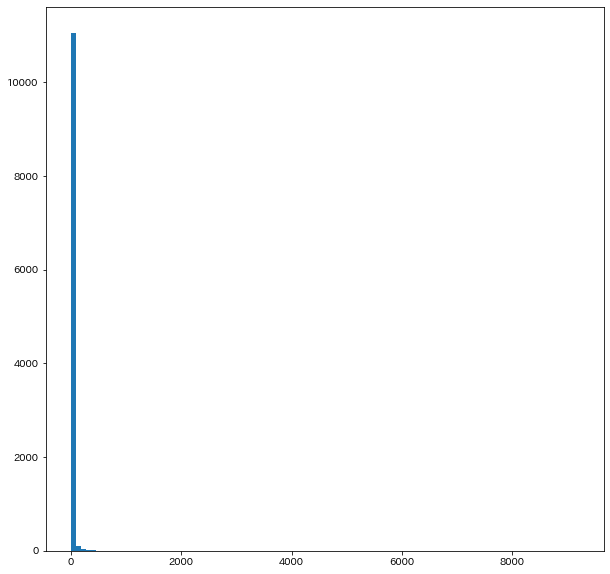

In [19]:
plt.figure(figsize=(10,10))
plt.hist(counts, bins=100)
plt.show()

## 39. Zipfの法則

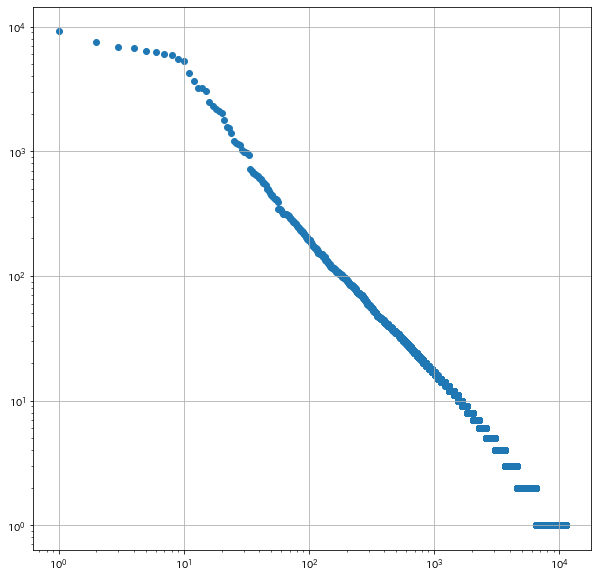

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(x=range(1, len(counts) + 1),y=counts)
plt.xscale("log")
plt.yscale("log")
plt.grid(axis="both")
plt.show()